In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)        
pd.set_option('display.max_rows', None)     
pd.set_option('display.float_format', '{:.4f}'.format)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

In [2]:
player_stats = pd.read_csv('../data/player_stats.csv')
match_events = pd.read_csv('../data/match_event_base.csv')
shots_events = pd.read_csv('../data/shot_events.csv')
card_events = pd.read_csv('../data/card_events.csv')
match_stats = pd.read_csv('../data/norm_matches.csv')
rounds = pd.read_csv('../data/matches.csv')
players = pd.read_csv('../data/players.csv', encoding='utf-8')
seasons = pd.read_csv('../data/seasons.csv')


#Agregar globales de cada jugador con su equipo, porcentaje de key_passes de el vs todo el team, etc para todas las variables descriptivas del rol.

In [3]:
rounds.head()

,match_id,season_id,round_number,round_name,match_datetime_utc,home_team_id,away_team_id,home_score,away_score,home_score_ht,away_score_ht
0,12437805,61643,8,NaN,2024-09-28 09:15:00-05,2818,2845,1,1,1,0
1,12437789,61643,8,NaN,2024-09-29 07:00:00-05,2821,24264,1,1,0,1
2,12437810,61643,9,NaN,2024-10-05 09:15:00-05,2859,2820,1,1,1,0
3,12437832,61643,9,NaN,2024-10-05 11:30:00-05,6577,2821,0,1,0,1
4,12437818,61643,9,NaN,2024-10-04 14:00:00-05,2845,2828,0,0,0,0


In [4]:
player_stats.head()

,player_match_stat_id,match_id,player_id,team_id,is_substitute,played_position,jersey_number,market_value_eur_at_match,sofascore_rating,minutes_played,touches,goals,assists,own_goals,passes_accurate,passes_total,passes_key,long_balls_accurate,long_balls_total,crosses_accurate,crosses_total,shots_total,shots_on_target,shots_off_target,shots_blocked_by_opponent,dribbles_successful,dribbles_attempts,possession_lost,dispossessed,duels_won,duels_lost,aerials_won,aerials_lost,ground_duels_won,ground_duels_total,tackles,interceptions,clearances,shots_blocked_by_player,dribbled_past,fouls_committed,fouls_suffered,saves,punches_made,high_claims,saves_inside_box,sweeper_keeper_successful,sweeper_keeper_total,goals_prevented,runs_out_successful,penalties_saved,penalty_committed,expected_goals,expected_assists,penalty_won,penalty_miss,big_chances_missed,errors_leading_to_shot,big_chances_created,errors_leading_to_goal
0,1,11352250,84844,60,f,G,1,1900000.0000,6.4000,90,46,0,0,0,27,39,0,6,18,0,0,0,0,0,0,0,0,12,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,-0.2972,0,0,0,0.0000,0.0053,0,0,0,0,0,0
1,2,11352250,943645,60,f,D,37,11600000.0000,6.9000,75,52,0,0,0,32,36,1,1,1,0,1,0,0,0,0,0,0,6,0,6,6,0,3,0,3,2,0,0,0,1,1,2,0,0,0,0,0,0,NaN,0,0,0,0.0000,0.0691,0,0,0,0,0,0
2,3,11352250,1023567,60,f,D,27,37000000.0000,6.5000,90,102,0,0,0,77,96,0,4,15,0,0,0,0,0,0,0,0,20,0,5,8,4,5,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,NaN,0,0,0,0.0000,0.0122,0,0,0,0,0,0
3,4,11352250,830659,60,f,D,25,22000000.0000,6.7000,60,62,0,0,0,43,51,0,3,8,0,0,0,0,0,0,0,0,10,1,3,6,1,2,2,0,2,1,3,1,2,1,0,0,0,0,0,0,0,NaN,0,0,0,0.0000,0.0172,0,0,0,0,0,0
4,5,11352250,1097425,60,f,D,3,36000000.0000,6.8000,90,75,0,0,0,31,40,1,2,3,1,4,0,0,0,0,0,0,17,1,10,6,4,2,6,3,2,0,3,0,1,0,3,0,0,0,0,0,0,NaN,0,0,0,0.0000,0.0493,0,0,0,0,0,0


In [5]:
match_stats_full = match_stats.loc[match_stats['period'] == 'ALL']
match_stats_goals = match_stats_full.merge(rounds[['match_id', 'home_score', 'away_score']], on = 'match_id', how = 'left')
match_stats_goals.head()

,team_match_stat_id,match_id,team_id,opp_team_id,home_away,period,formation,average_team_rating,total_team_market_value_eur,possession_percentage,big_chances,total_shots,saves,corners,fouls,passes_successful,passes_total,passes_percentage,tackles_successful,tackles_total,tackles_won_percentage,free_kicks,yellow_cards,red_cards,shots_on_target,hit_woodwork,shots_off_target,blocked_shots,shots_inside_box,shots_outside_box,big_chances_missed,fouled_final_third,offsides,accurate_passes_percentage,throw_ins,final_third_entries,long_balls_successful,long_balls_total,long_balls_percentage,crosses_successful,crosses_total,crosses_percentage,duels_won_successful,duels_won_total,duels_won_percentage,dispossessed,ground_duels_successful,ground_duels_total,ground_duels_percentage,aerial_duels_successful,aerial_duels_total,aerial_duels_percentage,dribbles_successful,dribbles_total,dribbles_percentage,interceptions,clearances,goal_kicks,expected_goals,touches_in_penalty_area,passes_in_final_third,recoveries,errors_lead_to_shot,goals_prevented,big_saves,errors_lead_to_goal,penalty_saves,big_chances_scored,round_number,season_id,match_datetime_utc,home_score,away_score
0,1,11352250,60,37,H,ALL,4-2-3-1,6.7900,300785000.0000,0.6300,1,14,1,10,9,0,517,NaN,6,17,0.3529,12,1,0,5,1,6,3,5,9,0,NaN,0,423,21,3,25,65,0.3800,2,23,0.0900,0,0,0.4100,17,39,88,0.4400,16,45,0.3600,10,23,0.4300,7,10,8,1.3700,0,0,69,0,-0.3000,0,0,0,1,1,52186,2023-08-12 09:00:00-05,1,1
1,2,11352250,37,60,A,ALL,4-2-3-1,7.0800,233830000.0000,0.3700,1,16,4,4,14,0,304,NaN,19,30,0.6333,9,4,0,3,1,9,4,12,4,1,NaN,2,206,22,1,21,58,0.3600,5,14,0.3600,0,0,0.5900,8,49,88,0.5600,29,45,0.6400,10,19,0.5300,6,29,11,1.0700,0,0,60,0,0.4000,0,0,0,0,1,52186,2023-08-12 09:00:00-05,1,1
2,7,11352251,42,14,H,ALL,4-3-3,7.1200,950700000.0000,0.7800,0,15,1,8,12,0,769,NaN,15,19,0.7895,12,2,0,7,1,3,5,8,7,0,NaN,2,693,18,2,15,33,0.4500,3,14,0.2100,0,0,0.4600,9,35,71,0.4900,12,32,0.3750,4,12,0.3300,7,9,8,0.8300,0,0,53,0,-0.0500,0,0,0,0,1,52186,2023-08-12 07:00:00-05,2,1
3,8,11352251,14,42,A,ALL,3-4-3,6.7500,308020000.0000,0.2200,2,6,5,3,12,0,200,NaN,10,17,0.5882,12,2,0,2,0,3,1,4,2,1,NaN,1,137,9,0,19,43,0.4400,1,6,0.1700,0,0,0.5400,11,36,71,0.5100,20,32,0.6250,7,15,0.4700,8,16,5,1.1800,0,0,48,0,-0.0200,0,0,0,1,1,52186,2023-08-12 07:00:00-05,2,1
4,13,11352252,30,72,H,ALL,4-2-3-1,7.2700,363899999.0000,0.7100,6,27,2,6,11,0,605,NaN,10,13,0.7692,12,2,0,12,3,10,5,20,7,2,NaN,2,551,16,5,17,30,0.5700,7,23,0.3000,0,0,0.4700,8,31,58,0.5300,12,33,0.3600,6,15,0.4000,4,13,8,4.0100,0,0,56,0,0.1100,0,0,0,4,1,52186,2023-08-12 09:00:00-05,4,1


In [6]:
player_stats_name = player_stats.merge(players[['player_id', 'name']], on = 'player_id', how = 'left')
player_stats_name.head()

,player_match_stat_id,match_id,player_id,team_id,is_substitute,played_position,jersey_number,market_value_eur_at_match,sofascore_rating,minutes_played,touches,goals,assists,own_goals,passes_accurate,passes_total,passes_key,long_balls_accurate,long_balls_total,crosses_accurate,crosses_total,shots_total,shots_on_target,shots_off_target,shots_blocked_by_opponent,dribbles_successful,dribbles_attempts,possession_lost,dispossessed,duels_won,duels_lost,aerials_won,aerials_lost,ground_duels_won,ground_duels_total,tackles,interceptions,clearances,shots_blocked_by_player,dribbled_past,fouls_committed,fouls_suffered,saves,punches_made,high_claims,saves_inside_box,sweeper_keeper_successful,sweeper_keeper_total,goals_prevented,runs_out_successful,penalties_saved,penalty_committed,expected_goals,expected_assists,penalty_won,penalty_miss,big_chances_missed,errors_leading_to_shot,big_chances_created,errors_leading_to_goal,name
0,1,11352250,84844,60,f,G,1,1900000.0000,6.4000,90,46,0,0,0,27,39,0,6,18,0,0,0,0,0,0,0,0,12,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,-0.2972,0,0,0,0.0000,0.0053,0,0,0,0,0,0,Neto
1,2,11352250,943645,60,f,D,37,11600000.0000,6.9000,75,52,0,0,0,32,36,1,1,1,0,1,0,0,0,0,0,0,6,0,6,6,0,3,0,3,2,0,0,0,1,1,2,0,0,0,0,0,0,NaN,0,0,0,0.0000,0.0691,0,0,0,0,0,0,Max Aarons
2,3,11352250,1023567,60,f,D,27,37000000.0000,6.5000,90,102,0,0,0,77,96,0,4,15,0,0,0,0,0,0,0,0,20,0,5,8,4,5,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,NaN,0,0,0,0.0000,0.0122,0,0,0,0,0,0,Illia Zabarnyi
3,4,11352250,830659,60,f,D,25,22000000.0000,6.7000,60,62,0,0,0,43,51,0,3,8,0,0,0,0,0,0,0,0,10,1,3,6,1,2,2,0,2,1,3,1,2,1,0,0,0,0,0,0,0,NaN,0,0,0,0.0000,0.0172,0,0,0,0,0,0,Marcos Senesi
4,5,11352250,1097425,60,f,D,3,36000000.0000,6.8000,90,75,0,0,0,31,40,1,2,3,1,4,0,0,0,0,0,0,17,1,10,6,4,2,6,3,2,0,3,0,1,0,3,0,0,0,0,0,0,NaN,0,0,0,0.0000,0.0493,0,0,0,0,0,0,Miloš Kerkez


In [ ]:
match_stats_home = match_stats_goals[match_stats_goals['home_away'] == 'H'].copy()
match_stats_away = match_stats_goals[match_stats_goals['home_away'] == 'A'].copy()

# 2. Unir estadísticas de jugadores con las estadísticas de su PROPIO equipo (usando match_stats_goals)
df_player_with_own_team_stats = pd.merge(
    player_stats_name,
    match_stats_goals.add_suffix('_own_team'), 
    left_on=['match_id', 'team_id'],
    right_on=['match_id_own_team', 'team_id_own_team'],
    how='left'
)

df_player_with_own_team_stats = df_player_with_own_team_stats.drop(
     columns=['match_id_own_team', 'team_id_own_team'])

match_stats_home_opponent = match_stats_home.add_suffix('_opponent_team')
match_stats_away_opponent = match_stats_away.add_suffix('_opponent_team')


players_whose_team_was_home = df_player_with_own_team_stats[
    df_player_with_own_team_stats['home_away_own_team'] == 'H'
].copy()

players_whose_team_was_away = df_player_with_own_team_stats[
    df_player_with_own_team_stats['home_away_own_team'] == 'A'
].copy()


# 5. Unir jugadores con estadísticas de su equipo OPONENTE

merged_for_home_players_team = pd.merge(
    players_whose_team_was_home,
    match_stats_away_opponent,
    left_on=['match_id', 'opp_team_id_own_team'],
    right_on=['match_id_opponent_team', 'team_id_opponent_team'],
    how='left'
)

merged_for_away_players_team = pd.merge(
    players_whose_team_was_away,
    match_stats_home_opponent, 
    left_on=['match_id', 'opp_team_id_own_team'],
    right_on=['match_id_opponent_team', 'team_id_opponent_team'],
    how='left'
)
# 6. Concatenar los resultados
df_final = pd.concat([merged_for_home_players_team, merged_for_away_players_team], ignore_index=True)

df_final.head()


,player_match_stat_id,match_id,player_id,team_id,is_substitute,played_position,jersey_number,market_value_eur_at_match,sofascore_rating,minutes_played,touches,goals,assists,own_goals,passes_accurate,passes_total,passes_key,long_balls_accurate,long_balls_total,crosses_accurate,crosses_total,shots_total,shots_on_target,shots_off_target,shots_blocked_by_opponent,dribbles_successful,dribbles_attempts,possession_lost,dispossessed,duels_won,duels_lost,aerials_won,aerials_lost,ground_duels_won,ground_duels_total,tackles,interceptions,clearances,shots_blocked_by_player,dribbled_past,fouls_committed,fouls_suffered,saves,punches_made,high_claims,saves_inside_box,sweeper_keeper_successful,sweeper_keeper_total,goals_prevented,runs_out_successful,penalties_saved,penalty_committed,expected_goals,expected_assists,penalty_won,penalty_miss,big_chances_missed,errors_leading_to_shot,big_chances_created,errors_leading_to_goal,name,team_match_stat_id_own_team,opp_team_id_own_team,home_away_own_team,period_own_team,formation_own_team,average_team_rating_own_team,total_team_market_value_eur_own_team,possession_percentage_own_team,big_chances_own_team,total_shots_own_team,saves_own_team,corners_own_team,fouls_own_team,passes_successful_own_team,passes_total_own_team,passes_percentage_own_team,tackles_successful_own_team,tackles_total_own_team,tackles_won_percentage_own_team,free_kicks_own_team,yellow_cards_own_team,red_cards_own_team,shots_on_target_own_team,hit_woodwork_own_team,shots_off_target_own_team,blocked_shots_own_team,shots_inside_box_own_team,shots_outside_box_own_team,big_chances_missed_own_team,fouled_final_third_own_team,offsides_own_team,accurate_passes_percentage_own_team,throw_ins_own_team,final_third_entries_own_team,long_balls_successful_own_team,long_balls_total_own_team,long_balls_percentage_own_team,crosses_successful_own_team,crosses_total_own_team,crosses_percentage_own_team,duels_won_successful_own_team,duels_won_total_own_team,duels_won_percentage_own_team,dispossessed_own_team,ground_duels_successful_own_team,ground_duels_total_own_team,ground_duels_percentage_own_team,aerial_duels_successful_own_team,aerial_duels_total_own_team,aerial_duels_percentage_own_team,dribbles_successful_own_team,dribbles_total_own_team,dribbles_percentage_own_team,interceptions_own_team,clearances_own_team,goal_kicks_own_team,expected_goals_own_team,touches_in_penalty_area_own_team,passes_in_final_third_own_team,recoveries_own_team,errors_lead_to_shot_own_team,goals_prevented_own_team,big_saves_own_team,errors_lead_to_goal_own_team,penalty_saves_own_team,big_chances_scored_own_team,round_number_own_team,season_id_own_team,match_datetime_utc_own_team,home_score_own_team,away_score_own_team
0,1,11352250,84844,60,f,G,1,1900000.0000,6.4000,90,46,0,0,0,27,39,0,6,18,0,0,0,0,0,0,0,0,12,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,-0.2972,0,0,0,0.0000,0.0053,0,0,0,0,0,0,Neto,1,37,H,ALL,4-2-3-1,6.7900,300785000.0000,0.6300,1,14,1,10,9,0,517,NaN,6,17,0.3529,12,1,0,5,1,6,3,5,9,0,NaN,0,423,21,3,25,65,0.3800,2,23,0.0900,0,0,0.4100,17,39,88,0.4400,16,45,0.3600,10,23,0.4300,7,10,8,1.3700,0,0,69,0,-0.3000,0,0,0,1,1,52186,2023-08-12 09:00:00-05,1,1
1,2,11352250,943645,60,f,D,37,11600000.0000,6.9000,75,52,0,0,0,32,36,1,1,1,0,1,0,0,0,0,0,0,6,0,6,6,0,3,0,3,2,0,0,0,1,1,2,0,0,0,0,0,0,NaN,0,0,0,0.0000,0.0691,0,0,0,0,0,0,Max Aarons,1,37,H,ALL,4-2-3-1,6.7900,300785000.0000,0.6300,1,14,1,10,9,0,517,NaN,6,17,0.3529,12,1,0,5,1,6,3,5,9,0,NaN,0,423,21,3,25,65,0.3800,2,23,0.0900,0,0,0.4100,17,39,88,0.4400,16,45,0.3600,10,23,0.4300,7,10,8,1.3700,0,0,69,0,-0.3000,0,0,0,1,1,52186,2023-08-12 09:00:00-05,1,1
2,3,11352250,1023567,60,f,D,27,37000000.0000,6.5000,90,102,0,0,0,77,96,0,4,15,0,0,0,0,0,0,0,0,20,0,5,8,4,5,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,NaN,0,0,0,0.0000,0.0122,0,0,0,0,0,0,Illia Zabarnyi,1,37,H,ALL,4-2-3-1,6.7900,300785000.0000,0.6300,1,14,1,10,9,0,517,NaN,6,17,0.3529,12,1,0,5,1,6,3,5,9,0,NaN,0,423,21,3,25,65,0.3800,2,23,0.0900,0,0,0.4100,17,39,88,0.4400,16,45,0.3600,10,23,0.4300,7

# Estudio Defensas

In [8]:
centrales = ['Virgil van Dijk', 'Antonio Rüdiger', 'Sergio Ramos']
laterales = ['Trent Alexander-Arnold', 'Daniel Carvajal', 'Kyle Walker']
medio_campo = ['Kevin De Bruyne', 'Luka Modrić', 'Toni Kroos', 'Pedri']
delanteros = ['Mohamed Salah', 'Lionel Messi', 'Karim Benzema', 'Erling Haaland']

top_players = centrales + laterales + medio_campo + delanteros

filtro_top_players = df_final['name'].isin(top_players)
df_final_jugadores_top = df_final.loc[filtro_top_players]
df_final_jugadores_top.head()

,player_match_stat_id,match_id,player_id,team_id,is_substitute,played_position,jersey_number,market_value_eur_at_match,sofascore_rating,minutes_played,touches,goals,assists,own_goals,passes_accurate,passes_total,passes_key,long_balls_accurate,long_balls_total,crosses_accurate,crosses_total,shots_total,shots_on_target,shots_off_target,shots_blocked_by_opponent,dribbles_successful,dribbles_attempts,possession_lost,dispossessed,duels_won,duels_lost,aerials_won,aerials_lost,ground_duels_won,ground_duels_total,tackles,interceptions,clearances,shots_blocked_by_player,dribbled_past,fouls_committed,fouls_suffered,saves,punches_made,high_claims,saves_inside_box,sweeper_keeper_successful,sweeper_keeper_total,goals_prevented,runs_out_successful,penalties_saved,penalty_committed,expected_goals,expected_assists,penalty_won,penalty_miss,big_chances_missed,errors_leading_to_shot,big_chances_created,errors_leading_to_goal,name,team_match_stat_id_own_team,opp_team_id_own_team,home_away_own_team,period_own_team,formation_own_team,average_team_rating_own_team,total_team_market_value_eur_own_team,possession_percentage_own_team,big_chances_own_team,total_shots_own_team,saves_own_team,corners_own_team,fouls_own_team,passes_successful_own_team,passes_total_own_team,passes_percentage_own_team,tackles_successful_own_team,tackles_total_own_team,tackles_won_percentage_own_team,free_kicks_own_team,yellow_cards_own_team,red_cards_own_team,shots_on_target_own_team,hit_woodwork_own_team,shots_off_target_own_team,blocked_shots_own_team,shots_inside_box_own_team,shots_outside_box_own_team,big_chances_missed_own_team,fouled_final_third_own_team,offsides_own_team,accurate_passes_percentage_own_team,throw_ins_own_team,final_third_entries_own_team,long_balls_successful_own_team,long_balls_total_own_team,long_balls_percentage_own_team,crosses_successful_own_team,crosses_total_own_team,crosses_percentage_own_team,duels_won_successful_own_team,duels_won_total_own_team,duels_won_percentage_own_team,dispossessed_own_team,ground_duels_successful_own_team,ground_duels_total_own_team,ground_duels_percentage_own_team,aerial_duels_successful_own_team,aerial_duels_total_own_team,aerial_duels_percentage_own_team,dribbles_successful_own_team,dribbles_total_own_team,dribbles_percentage_own_team,interceptions_own_team,clearances_own_team,goal_kicks_own_team,expected_goals_own_team,touches_in_penalty_area_own_team,passes_in_final_third_own_team,recoveries_own_team,errors_lead_to_shot_own_team,goals_prevented_own_team,big_saves_own_team,errors_lead_to_goal_own_team,penalty_saves_own_team,big_chances_scored_own_team,round_number_own_team,season_id_own_team,match_datetime_utc_own_team,home_score_own_team,away_score_own_team,team_match_stat_id_opponent_team,match_id_opponent_team,team_id_opponent_team,opp_team_id_opponent_team,home_away_opponent_team,period_opponent_team,formation_opponent_team,average_team_rating_opponent_team,total_team_market_value_eur_opponent_team,possession_percentage_opponent_team,big_chances_opponent_team,total_shots_opponent_team,saves_opponent_team,corners_opponent_team,fouls_opponent_team,passes_successful_opponent_team,passes_total_opponent_team,passes_percentage_opponent_team,tackles_successful_opponent_team,tackles_total_opponent_team,tackles_won_percentage_opponent_team,free_kicks_opponent_team,yellow_cards_opponent_team,red_cards_opponent_team,shots_on_target_opponent_team,hit_woodwork_opponent_team,shots_off_target_opponent_team,blocked_shots_opponent_team,shots_inside_box_opponent_team,shots_outside_box_opponent_team,big_chances_missed_opponent_team,fouled_final_third_opponent_team,offsides_opponent_team,accurate_passes_percentage_opponent_team,throw_ins_opponent_team,final_third_entries_opponent_team,long_balls_successful_opponent_team,long_balls_total_opponent_team,long_balls_percentage_opponent_team,crosses_successful_opponent_team,crosses_total_opponent_team,crosses_percentage_opponent_team,duels_won_successful_opponent_team,duels_won_total_opp

In [10]:
def safe_divide(numerator, denominator):
    num = pd.Series(numerator)
    den = pd.Series(denominator)
    return np.where((den.isnull()) | (den == 0) | (num.isnull()), np.nan, num / den)

df_centrales = df_final_jugadores_top.loc[(df_final_jugadores_top['name'].isin(centrales)) & (df_final_jugadores_top['minutes_played'] >= 45)]
metricas_clave_centrales = ['aerials_lost', 'aerials_won', 'aerial_duels_successful_own_team',
                        'big_chances_opponent_team', 'big_chances_scored_opponent_team', 'goals',
                        'clearances', 'clearances_own_team', 'corners_opponent_team',
                        'crosses_successful_opponent_team', 'crosses_total_opponent_team',
                        'dribbled_past', 'duels_lost', 'duels_won', 'errors_lead_to_goal_own_team',
                        'errors_lead_to_shot_own_team', 'errors_leading_to_goal', 'errors_leading_to_shot',
                        'expected_goals_own_team', 
                        'final_third_entries_opponent_team', 'fouls_committed',
                        'fouls_opponent_team', 'ground_duels_total', 'ground_duels_won', 'ground_duels_percentage_own_team',
                        'interceptions', 'interceptions_own_team',
                        'long_balls_accurate', 'long_balls_total', 'minutes_played', 'offsides_opponent_team',
                        'own_goals', 'passes_accurate', 'passes_total', 'passes_total_own_team',
                        'penalty_committed', 'possession_lost',
                        'possession_percentage_own_team', 'recoveries_own_team',
                        'shots_blocked_by_player', 'shots_on_target_opponent_team', 'shots_on_target_own_team',
                        'sofascore_rating', 'tackles', 'tackles_won_percentage_own_team', 'total_shots_opponent_team', 'total_shots_own_team',
                        'touches_in_penalty_area_opponent_team']


df_centrales['aerials_won_vs_team_ratio'] = df_centrales['aerials_won'] / df_centrales['aerial_duels_successful_own_team']
df_centrales['ground_duels_won_vs_team_ratio'] = df_centrales['ground_duels_won'] / df_centrales['ground_duels_percentage_own_team']
df_centrales['interceptions_vs_team_ratio'] = df_centrales['interceptions'] / df_centrales['interceptions_own_team']
df_centrales['clearances_vs_team_ratio'] = df_centrales['clearances'] / df_centrales['clearances_own_team']
df_centrales['tackles_vs_team_ratio'] = df_centrales['tackles'] / df_centrales['tackles_won_percentage_own_team']
df_centrales['passes_total_vs_team_ratio'] = df_centrales['passes_total'] / df_centrales['passes_total_own_team']
df_centrales['goles_recibidos_vs_ball_poss'] = np.where(
    df_centrales['home_away_own_team'] == 'H',
    safe_divide(df_centrales['away_score_opponent_team'], df_centrales['possession_percentage_opponent_team']),
    safe_divide(df_centrales['home_score_opponent_team'], df_centrales['possession_percentage_opponent_team'])
)

df_centrales['goles_recibidos_vs_big_chances_created'] = np.where(
    df_centrales['home_away_own_team'] == 'H',
    safe_divide(df_centrales['away_score_opponent_team'], df_centrales['big_chances_opponent_team']),
    safe_divide(df_centrales['home_score_opponent_team'], df_centrales['big_chances_opponent_team'])
)

df_centrales['possession_lost_vs_team_ratio'] = safe_divide(
        df_centrales['possession_lost'],
        df_centrales['dispossessed_own_team']
    )

df_centrales['fouls_committed_vs_team_ratio'] = safe_divide(
        df_centrales['fouls_committed'],
        df_centrales['fouls_own_team']
    )

df_centrales['long_balls_acc_vs_team_ratio'] = safe_divide(
        df_centrales['long_balls_accurate'],
        df_centrales['long_balls_percentage_own_team'] * 100
    )

df_centrales['shots_blocked_vs_team_ratio'] = safe_divide(
        df_centrales['shots_blocked_by_player'],
        df_centrales['blocked_shots_opponent_team']
)
df_centrales['control_balon'] = safe_divide(
    df_centrales['possession_lost'], 
    df_centrales['touches']
)

nuevas = ['aerials_won_vs_team_ratio', 'ground_duels_won_vs_team_ratio', 'interceptions_vs_team_ratio', 'clearances_vs_team_ratio',
          'tackles_vs_team_ratio', 'passes_total_vs_team_ratio', 'goles_recibidos_vs_ball_poss', 'goles_recibidos_vs_big_chances_created',
          'possession_lost_vs_team_ratio', 'fouls_committed_vs_team_ratio', 'long_balls_acc_vs_team_ratio', 'shots_blocked_vs_team_ratio',
          'control_balon']
metricas_clave_centrales = metricas_clave_centrales + nuevas
df_centrales_means = df_centrales.groupby(['player_id', 'name'])[metricas_clave_centrales].agg(['mean', 'sum']).reset_index()

flat_columns = []
for col in df_centrales_means.columns:
    if isinstance(col, tuple):
        if col[1] == 'mean':
            flat_columns.append(f"{col[0]}_m")
        elif col[1] == 'sum':
            flat_columns.append(f"{col[0]}_s")
        else:
            flat_columns.append(col[0])  
    else:
        flat_columns.append(col)  

df_centrales_means.columns = flat_columns

df_centrales_means = df_centrales_means.sort_values(by='sofascore_rating_m', ascending=False).head()
df_centrales_means.head()

C:\Users\javie\AppData\Local\Temp\ipykernel_30844\4008948793.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centrales['aerials_won_vs_team_ratio'] = df_centrales['aerials_won'] / df_centrales['aerial_duels_successful_own_team']
C:\Users\javie\AppData\Local\Temp\ipykernel_30844\4008948793.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centrales['ground_duels_won_vs_team_ratio'] = df_centrales['ground_duels_won'] / df_centrales['ground_duels_percentage_own_team']
C:\Users\javie\AppData\Local

,player_id,name,aerials_lost_m,aerials_lost_s,aerials_won_m,aerials_won_s,aerial_duels_successful_own_team_m,aerial_duels_successful_own_team_s,big_chances_opponent_team_m,big_chances_opponent_team_s,big_chances_scored_opponent_team_m,big_chances_scored_opponent_team_s,goals_m,goals_s,clearances_m,clearances_s,clearances_own_team_m,clearances_own_team_s,corners_opponent_team_m,corners_opponent_team_s,crosses_successful_opponent_team_m,crosses_successful_opponent_team_s,crosses_total_opponent_team_m,crosses_total_opponent_team_s,dribbled_past_m,dribbled_past_s,duels_lost_m,duels_lost_s,duels_won_m,duels_won_s,errors_lead_to_goal_own_team_m,errors_lead_to_goal_own_team_s,errors_lead_to_shot_own_team_m,errors_lead_to_shot_own_team_s,errors_leading_to_goal_m,errors_leading_to_goal_s,errors_leading_to_shot_m,errors_leading_to_shot_s,expected_goals_own_team_m,expected_goals_own_team_s,final_third_entries_opponent_team_m,final_third_entries_opponent_team_s,fouls_committed_m,fouls_committed_s,fouls_opponent_team_m,fouls_opponent_team_s,ground_duels_total_m,ground_duels_total_s,ground_duels_won_m,ground_duels_won_s,ground_duels_percentage_own_team_m,ground_duels_percentage_own_team_s,interceptions_m,interceptions_s,interceptions_own_team_m,interceptions_own_team_s,long_balls_accurate_m,long_balls_accurate_s,long_balls_total_m,long_balls_total_s,minutes_played_m,minutes_played_s,offsides_opponent_team_m,offsides_opponent_team_s,own_goals_m,own_goals_s,passes_accurate_m,passes_accurate_s,passes_total_m,passes_total_s,passes_total_own_team_m,passes_total_own_team_s,penalty_committed_m,penalty_committed_s,possession_lost_m,possession_lost_s,possession_percentage_own_team_m,possession_percentage_own_team_s,recoveries_own_team_m,recoveries_own_team_s,shots_blocked_by_player_m,shots_blocked_by_player_s,shots_on_target_opponent_team_m,shots_on_target_opponent_team_s,shots_on_target_own_team_m,shots_on_target_own_team_s,sofascore_rating_m,sofascore_rating_s,tackles_m,tackles_s,tackles_won_percentage_own_team_m,tackles_won_percentage_own_team_s,total_shots_opponent_team_m,total_shots_opponent_team_s,total_shots_own_team_m,total_shots_own_team_s,touches_in_penalty_area_opponent_team_m,touches_in_penalty_area_opponent_team_s,aerials_won_vs_team_ratio_m,aerials_won_vs_team_ratio_s,ground_duels_won_vs_team_ratio_m,ground_duels_won_vs_team_ratio_s,interceptions_vs_team_ratio_m,interceptions_vs_team_ratio_s,clearances_vs_team_ratio_m,clearances_vs_team_ratio_s,tackles_vs_team_ratio_m,tackles_vs_team_ratio_s,passes_total_vs_team_ratio_m,passes_total_vs_team_ratio_s,goles_recibidos_vs_ball_poss_m,goles_recibidos_vs_ball_poss_s,goles_recibidos_vs_big_chances_created_m,goles_recibidos_vs_big_chances_created_s,possession_lost_vs_team_ratio_m,possession_lost_vs_team_ratio_s,fouls_committed_vs_team_ratio_m,fouls_committed_vs_team_ratio_s,long_balls_acc_vs_team_ratio_m,long_balls_acc_vs_team_ratio_s,shots_blocked_vs_team_ratio_m,shots_blocked_vs_team_ratio_s,control_balon_m,control_balon_s
0,10710,Sergio Ramos,1.3721,59,2.5581,110,14.4651,622,2.4651,106,0.7674,33,0.1163,5,4.5349,195,17.0233,732,5.0465,217,4.1628,179,17.9302,771,0.3953,17,2.8372,122,4.8372,208,0.0000,0,0.0000,0,0.0000,0,0.0233,1,1.1932,33.4100,2.0233,87,1.0233,44,11.2093,482,0.3721,16,1.9535,84,0.5272,22.6700,1.3953,60,9.1860,395,6.7674,291,9.5581,411,88.2326,3794,1.9535,84,0.0233,1,55.0000,2365,60.8837,2618,502.5116,21608,0.0465,2,6.7209,289,0.5370,23.0900,36.2558,1559,0.8140,35,4.3721,188,4.3256,186,7.3047,314.1000,1.3953,60,0.6703,28.8227,11.9767,515,12.8837,554,1.3256,57,0.1729,7.4345,3.7434,160.9673,0.1598,6.8733,0.2688,11.5569,2.1749,93.5207,0.1200,5.1607,2.7411,117.8693,0.5450,21.8000,1.1064,47.5758,0.0885,3.8052,0.1224,5.2641,0.3138,11.6123,0.0941,4.0464
2,151545,Virgil van Dijk,1.1014,152,3.4493,476,13.8696,1914,2.0000,276,0.6304,87,0.0797,11,4.0507,559,15.1594,2092,3.5725,493,2.9348,405,12.8768,1777,0.1957,27,1.8478,255,4.6812,646,0.0652,9,0.1377,19,0.0290,4,0.0290,4,2.1943,219.4300,

# Visualizaciones

C:\Users\javie\AppData\Local\Temp\ipykernel_30844\1646429812.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='name', data=df_plot, ax=ax, palette="viridis")
C:\Users\javie\AppData\Local\Temp\ipykernel_30844\1646429812.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=65, fontsize=8)
C:\Users\javie\AppData\Local\Temp\ipykernel_30844\1646429812.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='name', data=df_plot, ax=ax, palette="viridis")
C:\Users\javie\AppData\Local\Temp\ipykernel_30844\1646429812.py:26: UserWarning: set_ticklab

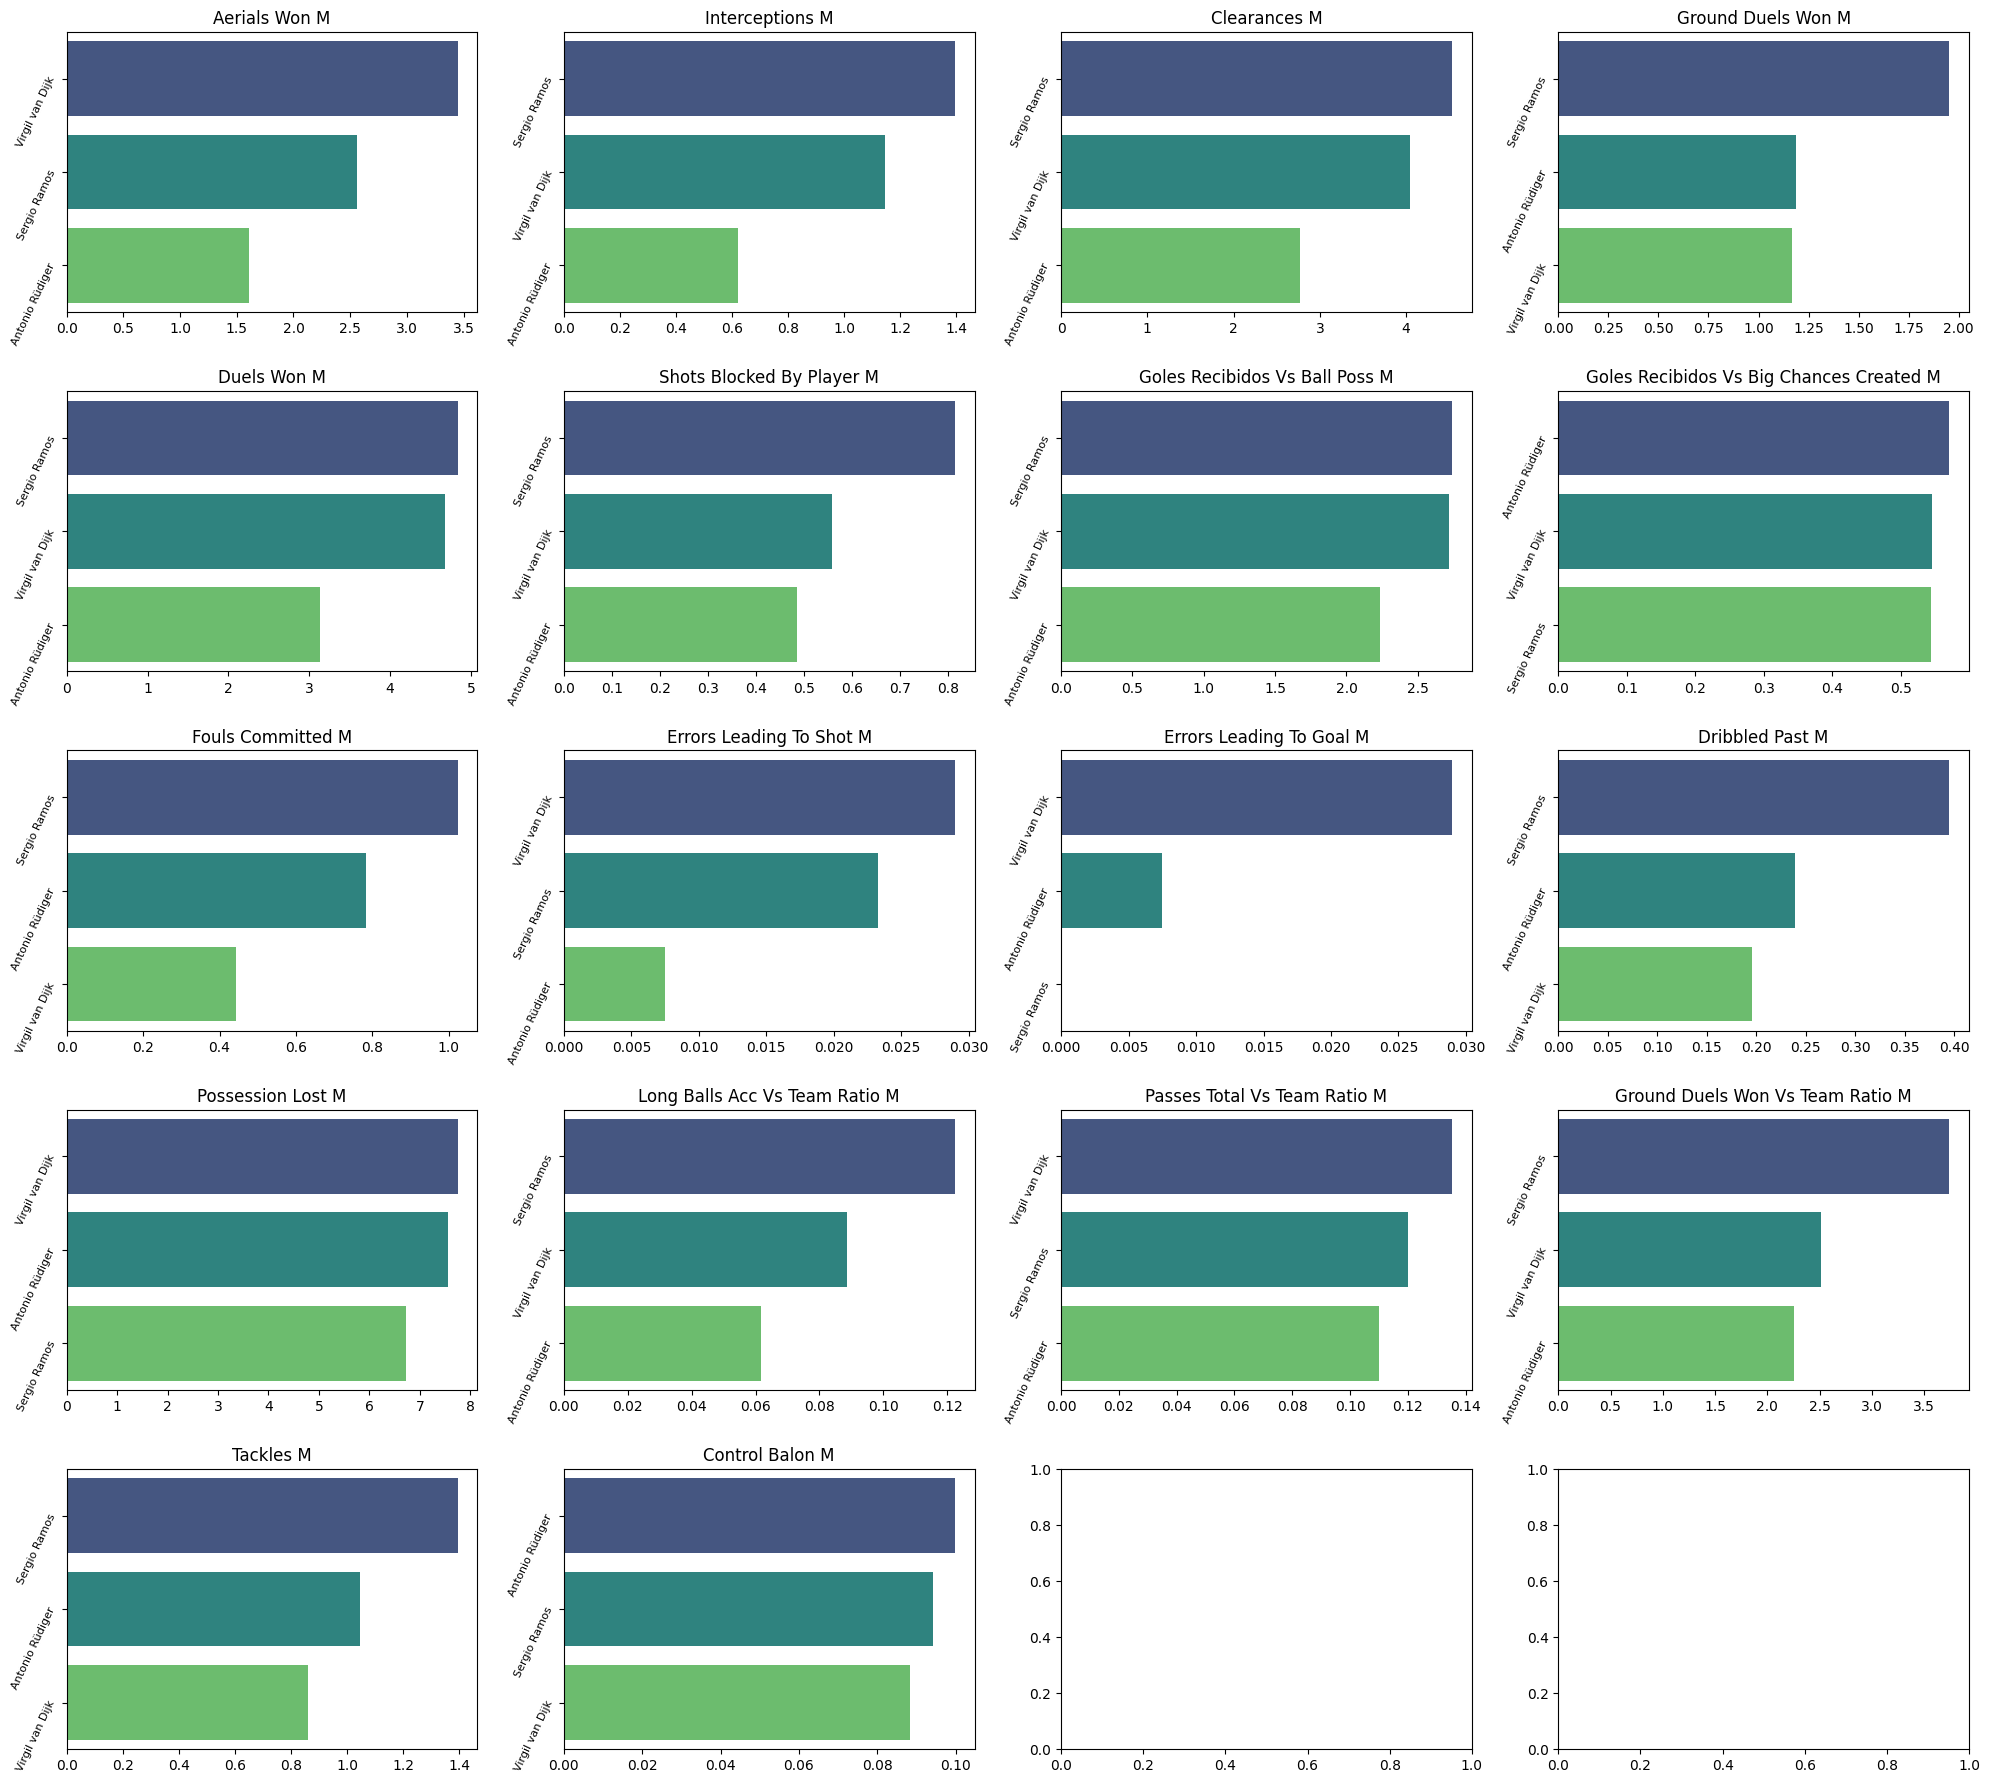

In [12]:
variables_comparar = ['aerials_won_m', 'interceptions_m', 'clearances_m' , 'ground_duels_won_m', 'duels_won_m',
                      'shots_blocked_by_player_m', 'goles_recibidos_vs_ball_poss_m', 'goles_recibidos_vs_big_chances_created_m',
                      'fouls_committed_m', 'errors_leading_to_shot_m', 'errors_leading_to_goal_m', 'dribbled_past_m',
                    'possession_lost_m', 'long_balls_acc_vs_team_ratio_m', 'passes_total_vs_team_ratio_m', 'ground_duels_won_vs_team_ratio_m',
                    'tackles_m', 'control_balon_m']

dict_best_player = {}
vars_higher_better = ['aerials_won_m', 'interceptions_m', 'clearances_m', 'ground_duels_won_m',
                      'duels_won_m', 'shots_blocked_by_player_m', 'long_balls_acc_vs_team_ratio_m',
                      'passes_total_vs_team_ratio_m', 'ground_duels_won_vs_team_ratio_m', 'tackles_m',
                      'control_balon_m']

vars_lower_better = ['goles_recibidos_vs_ball_poss_m', 'goles_recibidos_vs_big_chances_created_m', 'fouls_committed_m',
                      'errors_leading_to_shot_m', 'errors_leading_to_goal_m', 'dribbled_past_m', 'possession_lost_m']

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 18))
axes = axes.flatten()  
# Barplot por cada variable
for i, var in enumerate(variables_comparar):
    ax = axes[i]
    df_plot = df_centrales_means[['name', var]].sort_values(by=var, ascending=False)
    sns.barplot(x=var, y='name', data=df_plot, ax=ax, palette="viridis")
    ax.set_title(var.replace('_', ' ').title())
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=65, fontsize=8)
    if var in vars_lower_better:
        minimum = df_centrales_means[var].min()
        best_name = df_centrales_means[df_centrales_means[var] == minimum]['name'].values[0]
        dict_best_player[var] = (best_name, minimum)
    else:
        maximum = df_centrales_means[var].max()
        best_name = df_centrales_means[df_centrales_means[var] == maximum]['name'].values[0]
        dict_best_player[var] = (best_name, maximum)

for j in range(len(variables_comparar), len(axes)):
    axes[j].set_visible(True)
plt.tight_layout()
plt.show()

In [13]:
print('Métricas base: ')
dict_best_player

Métricas base: 


{'aerials_won_m': ('Virgil van Dijk', np.float64(3.449275362318841)),
 'interceptions_m': ('Sergio Ramos', np.float64(1.3953488372093024)),
 'clearances_m': ('Sergio Ramos', np.float64(4.534883720930233)),
 'ground_duels_won_m': ('Sergio Ramos', np.float64(1.9534883720930232)),
 'duels_won_m': ('Sergio Ramos', np.float64(4.837209302325581)),
 'shots_blocked_by_player_m': ('Sergio Ramos', np.float64(0.813953488372093)),
 'goles_recibidos_vs_ball_poss_m': ('Antonio Rüdiger',
  np.float64(2.2373432286923918)),
 'goles_recibidos_vs_big_chances_created_m': ('Sergio Ramos',
  np.float64(0.545)),
 'fouls_committed_m': ('Virgil van Dijk', np.float64(0.4420289855072464)),
 'errors_leading_to_shot_m': ('Antonio Rüdiger',
  np.float64(0.007462686567164179)),
 'errors_leading_to_goal_m': ('Sergio Ramos', np.float64(0.0)),
 'dribbled_past_m': ('Virgil van Dijk', np.float64(0.1956521739130435)),
 'possession_lost_m': ('Sergio Ramos', np.float64(6.72093023255814)),
 'long_balls_acc_vs_team_ratio_m': 

In [15]:
df_defensas = df_final.loc[(df_final['played_position'] == 'D')]
df_defensas['excelent_perf'] = np.where(df_defensas['sofascore_rating'] >= 8.25, 1, 0)

metricas_clave_centrales = ['aerials_lost', 'aerials_won', 'aerial_duels_successful_own_team',
                        'big_chances_opponent_team', 'big_chances_scored_opponent_team', 'goals',
                        'clearances', 'clearances_own_team', 'corners_opponent_team',
                        'crosses_successful_opponent_team', 'crosses_total_opponent_team',
                        'dribbled_past', 'duels_lost', 'duels_won', 'errors_lead_to_goal_own_team',
                        'errors_lead_to_shot_own_team', 'errors_leading_to_goal', 'errors_leading_to_shot',
                        'expected_goals_own_team', 
                        'final_third_entries_opponent_team', 'fouls_committed',
                        'fouls_opponent_team', 'ground_duels_total', 'ground_duels_won', 'ground_duels_percentage_own_team',
                        'interceptions', 'interceptions_own_team',
                        'long_balls_accurate', 'long_balls_total', 'minutes_played', 'offsides_opponent_team',
                        'own_goals', 'passes_accurate', 'passes_total', 'passes_total_own_team',
                        'penalty_committed', 'possession_lost',
                        'possession_percentage_own_team', 'recoveries_own_team',
                        'shots_blocked_by_player', 'shots_on_target_opponent_team', 'shots_on_target_own_team',
                        'sofascore_rating', 'tackles', 'tackles_won_percentage_own_team', 'total_shots_opponent_team', 'total_shots_own_team',
                        'touches_in_penalty_area_opponent_team', 'excelent_perf']


df_defensas['aerials_won_vs_team_ratio'] = df_defensas['aerials_won'] / df_defensas['aerial_duels_successful_own_team']
df_defensas['ground_duels_won_vs_team_ratio'] = df_defensas['ground_duels_won'] / df_defensas['ground_duels_percentage_own_team']
df_defensas['interceptions_vs_team_ratio'] = df_defensas['interceptions'] / df_defensas['interceptions_own_team']
df_defensas['clearances_vs_team_ratio'] = df_defensas['clearances'] / df_defensas['clearances_own_team']
df_defensas['tackles_vs_team_ratio'] = df_defensas['tackles'] / df_defensas['tackles_won_percentage_own_team']
df_defensas['passes_total_vs_team_ratio'] = df_defensas['passes_total'] / df_defensas['passes_total_own_team']
df_defensas['goles_recibidos_vs_ball_poss'] = np.where(
    df_defensas['home_away_own_team'] == 'H',
    safe_divide(df_defensas['away_score_opponent_team'], df_defensas['possession_percentage_opponent_team']),
    safe_divide(df_defensas['home_score_opponent_team'], df_defensas['possession_percentage_opponent_team'])
)

df_defensas['goles_recibidos_vs_big_chances_created'] = np.where(
    df_defensas['home_away_own_team'] == 'H',
    safe_divide(df_defensas['away_score_opponent_team'], df_defensas['big_chances_opponent_team']),
    safe_divide(df_defensas['home_score_opponent_team'], df_defensas['big_chances_opponent_team'])
)

df_defensas['possession_lost_vs_team_ratio'] = safe_divide(
        df_defensas['possession_lost'],
        df_defensas['dispossessed_own_team']
    )

df_defensas['fouls_committed_vs_team_ratio'] = safe_divide(
        df_defensas['fouls_committed'],
        df_defensas['fouls_own_team']
    )

df_defensas['long_balls_acc_vs_team_ratio'] = safe_divide(
        df_defensas['long_balls_accurate'],
        df_defensas['long_balls_percentage_own_team'] * 100
    )

df_defensas['shots_blocked_vs_team_ratio'] = safe_divide(
        df_defensas['shots_blocked_by_player'],
        df_defensas['blocked_shots_opponent_team']
)
df_defensas['control_balon'] = safe_divide(
    df_defensas['possession_lost'], 
    df_defensas['touches']
)
nuevas = ['aerials_won_vs_team_ratio', 'ground_duels_won_vs_team_ratio', 'interceptions_vs_team_ratio', 'clearances_vs_team_ratio',
          'tackles_vs_team_ratio', 'passes_total_vs_team_ratio', 'goles_recibidos_vs_ball_poss', 'goles_recibidos_vs_big_chances_created',
          'possession_lost_vs_team_ratio', 'fouls_committed_vs_team_ratio', 'long_balls_acc_vs_team_ratio', 'shots_blocked_vs_team_ratio',
          'control_balon']

metricas_clave_centrales = metricas_clave_centrales + nuevas
'''
#TREMENDO PRO TIP
agg_dict = {col: 'mean' for col in metricas_clave_centrales if col != 'excelent_perf'}
df_defensas_means = df_defensas.groupby(['player_id', 'name']).agg(agg_dict).reset_index()
'''



C:\Users\javie\AppData\Local\Temp\ipykernel_30844\4047488022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defensas['excelent_perf'] = np.where(df_defensas['sofascore_rating'] >= 8.25, 1, 0)
C:\Users\javie\AppData\Local\Temp\ipykernel_30844\4047488022.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defensas['aerials_won_vs_team_ratio'] = df_defensas['aerials_won'] / df_defensas['aerial_duels_successful_own_team']
C:\Users\javie\AppData\Local\Temp\ipykernel_30844\4047488022.py:24: SettingWit

"\n#TREMENDO PRO TIP\nagg_dict = {col: 'mean' for col in metricas_clave_centrales if col != 'excelent_perf'}\ndf_defensas_means = df_defensas.groupby(['player_id', 'name']).agg(agg_dict).reset_index()\n"

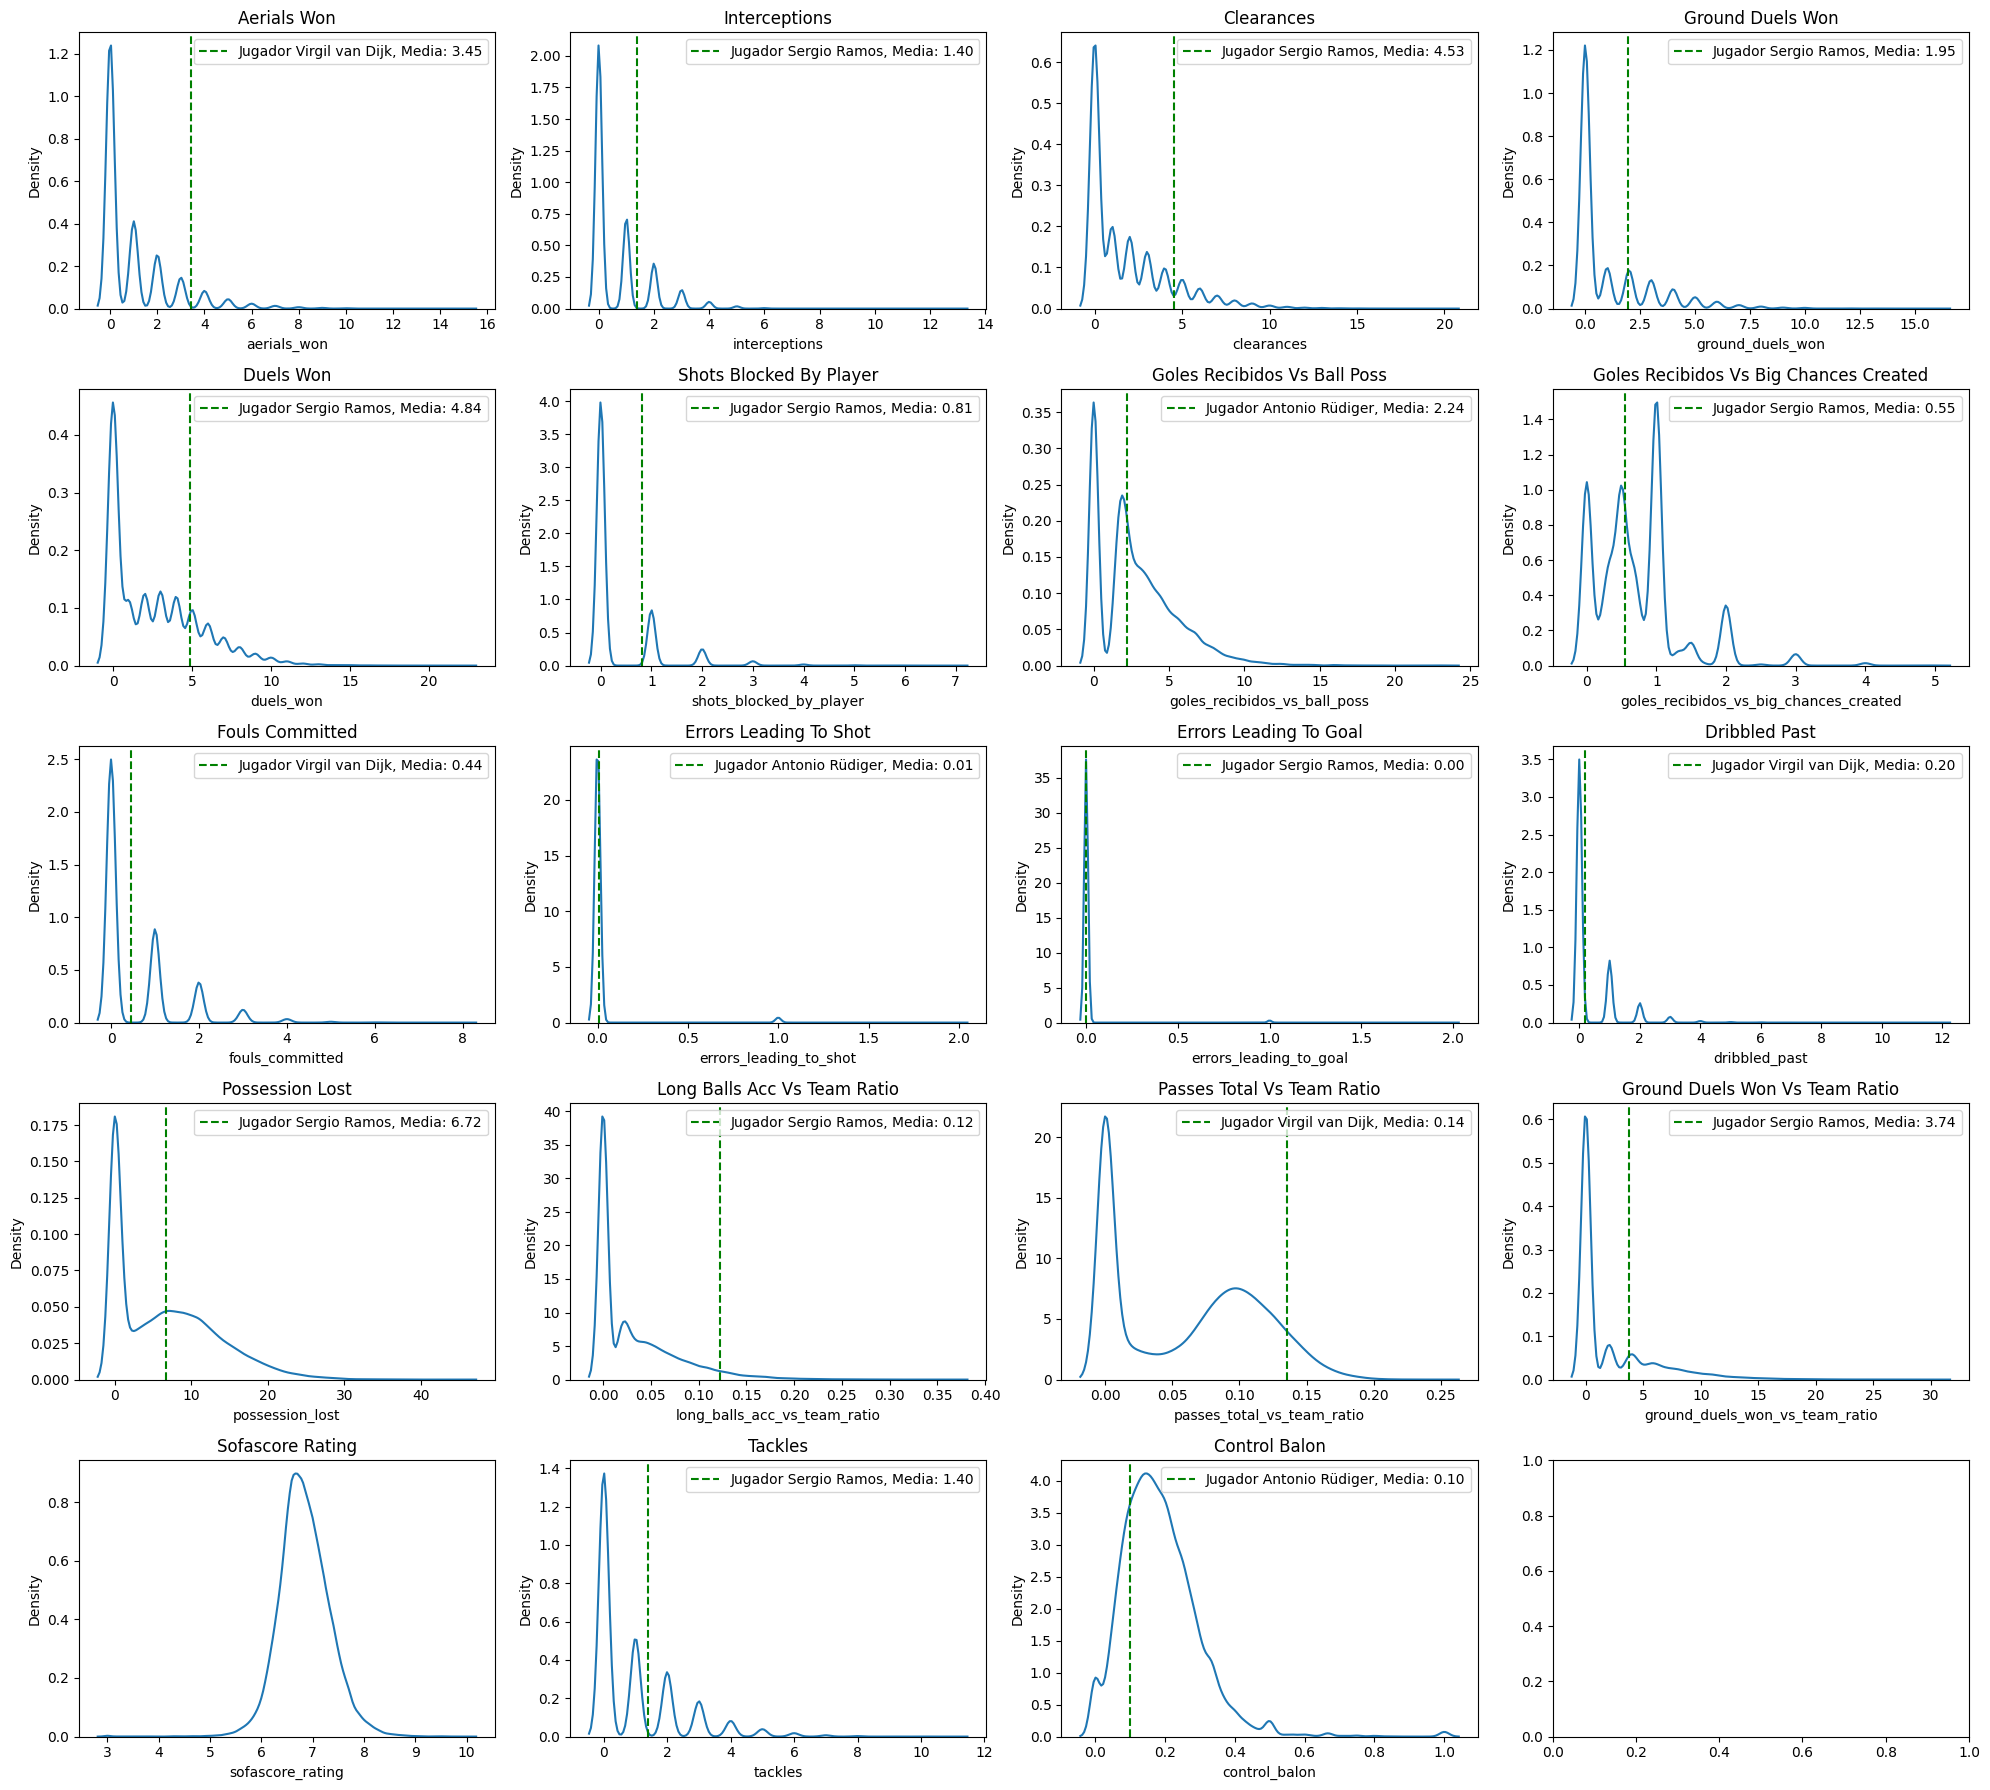

In [17]:
variables_comparar = ['aerials_won', 'interceptions', 'clearances' , 'ground_duels_won', 'duels_won',
                      'shots_blocked_by_player', 'goles_recibidos_vs_ball_poss', 'goles_recibidos_vs_big_chances_created',
                      'fouls_committed', 'errors_leading_to_shot', 'errors_leading_to_goal', 'dribbled_past',
                    'possession_lost', 'long_balls_acc_vs_team_ratio', 'passes_total_vs_team_ratio', 'ground_duels_won_vs_team_ratio',
                    'sofascore_rating', 'tackles', 'control_balon']

vars_higher_better = ['aerials_won', 'interceptions', 'clearances', 'ground_duels_won',
                      'duels_won', 'shots_blocked_by_player', 'long_balls_acc_vs_team_ratio',
                      'passes_total_vs_team_ratio', 'ground_duels_won_vs_team_ratio', 'tackles',
                      'control_balon']

vars_lower_better = ['goles_recibidos_vs_ball_poss', 'goles_recibidos_vs_big_chances_created', 'fouls_committed',
                      'errors_leading_to_shot', 'errors_leading_to_goal', 'dribbled_past', 'possession_lost']

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 18))
axes = axes.flatten()  
# Barplot por cada variable
for i, var in enumerate(variables_comparar):
    ax = axes[i]
    sns.kdeplot(x = var, data = df_defensas, ax=ax)
    ax.set_title(var.replace('_', ' ').title())
    ax.set_xlabel(f'{var}')
    if var == 'sofascore_rating':
        continue
    var = f"{var}_m"
    ax.axvline(dict_best_player[var][1], linestyle='--', color='green', 
           label=f'Jugador {dict_best_player[var][0]}, Media: {dict_best_player[var][1]:.2f}')
    ax.legend(loc = 'best')

for j in range(len(variables_comparar), len(axes)):
    axes[j].set_visible(True)
plt.tight_layout()

plt.show()

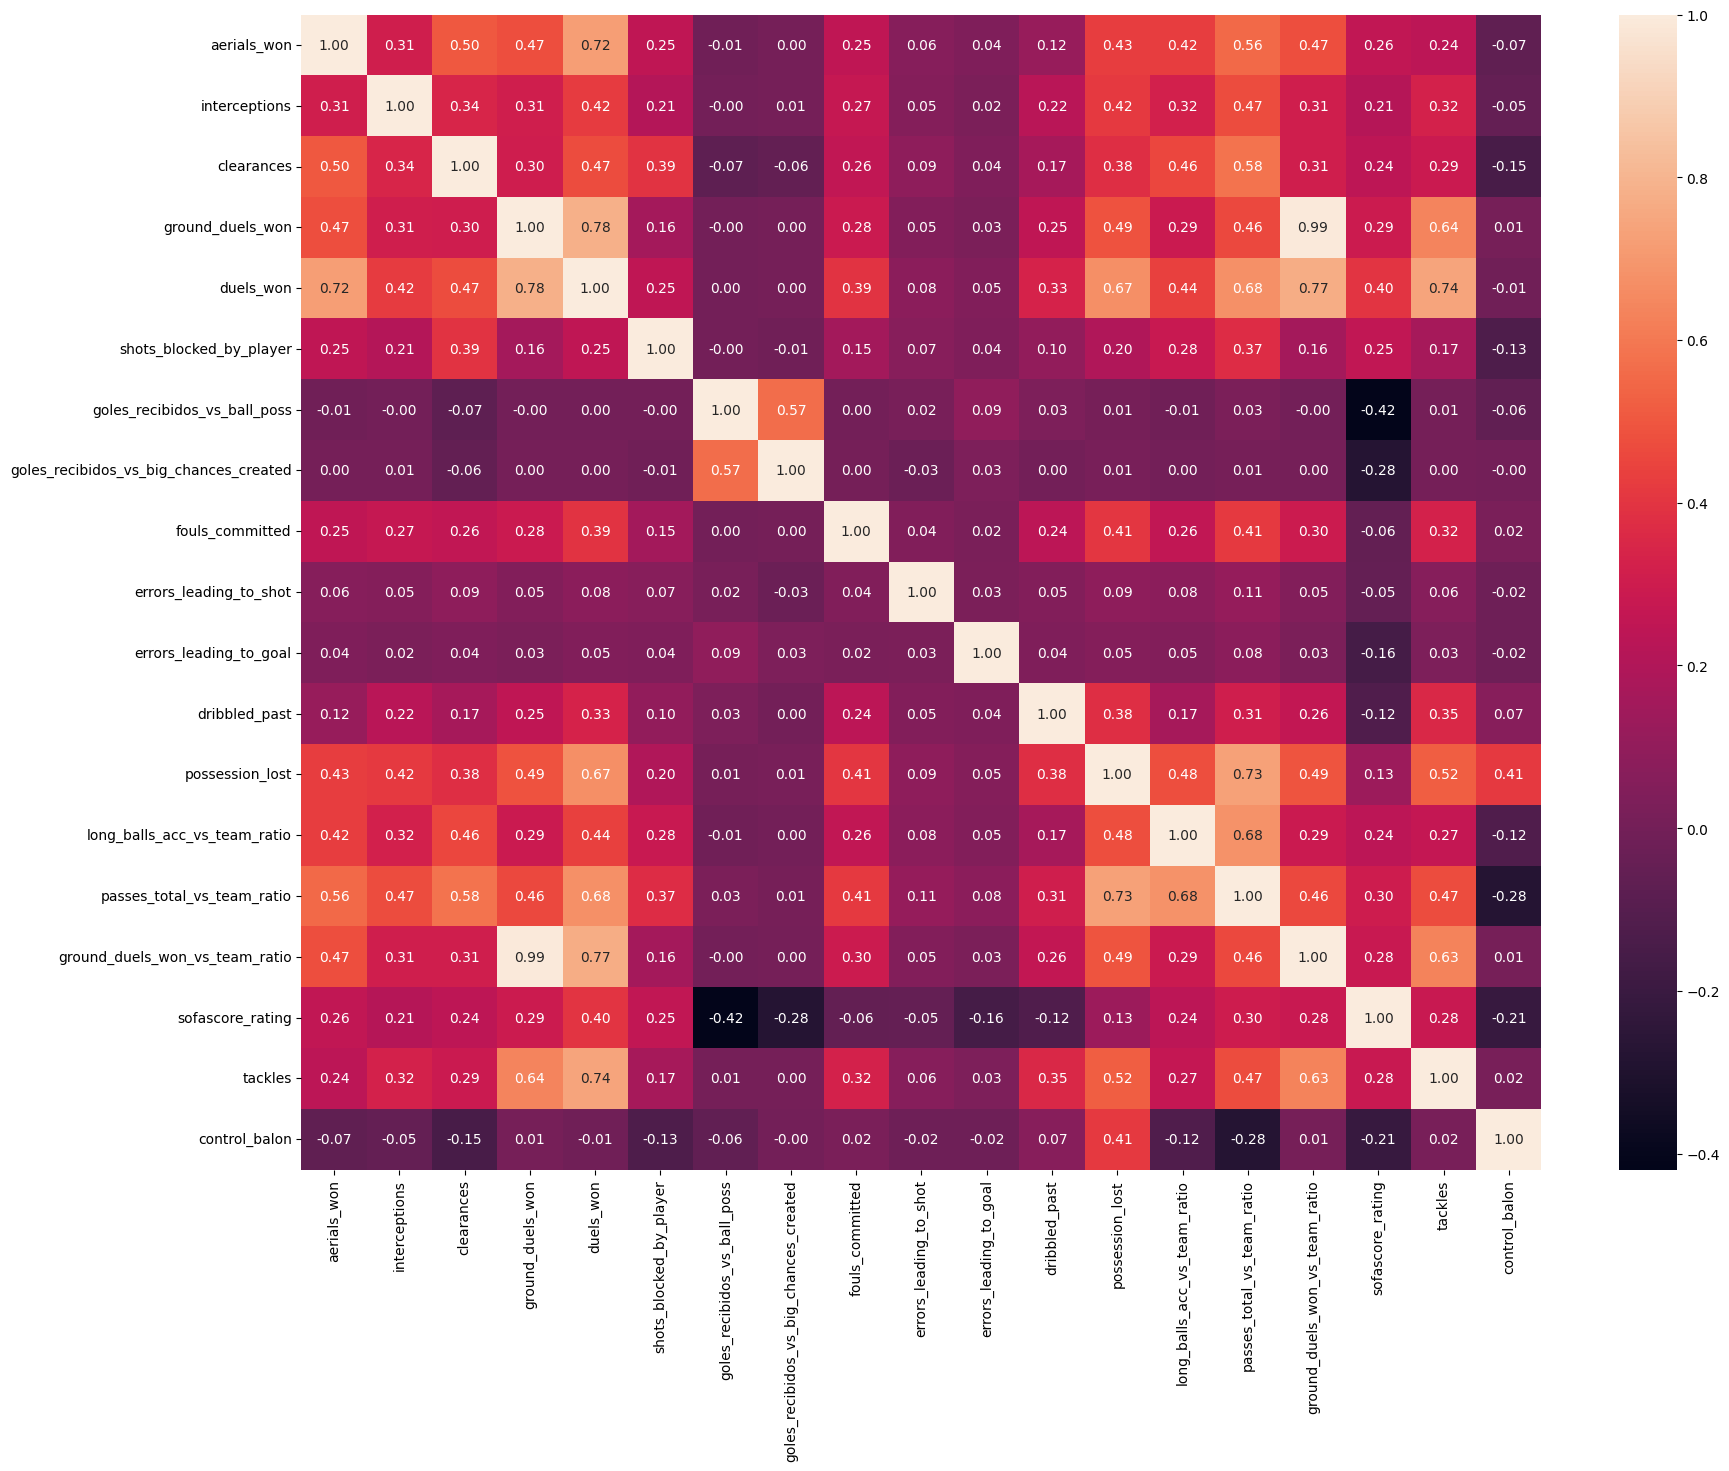

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(df_defensas[variables_comparar].corr(), annot = True, fmt = '2.2f')
plt.show()